<a href="https://colab.research.google.com/github/Nidhi-S-Vas/Assignment-case_studies/blob/main/Casestudy_03_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study on Computer Vision

# Classifying Fruits and Vegetables Using Image Classification

#Loading the dataset using Kaggle API

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nidhisvas","key":"81deb5228c378bc81446f64fc46bb2b5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 99% 1.97G/1.98G [00:41<00:00, 35.7MB/s]
100% 1.98G/1.98G [00:41<00:00, 51.7MB/s]


In [ ]:
!unzip fruit-and-vegetable-image-recognition.zip


Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

In [ ]:
!ls


fruit-and-vegetable-image-recognition.zip  sample_data	test  train  validation


#Loading and Preprocessing Dataset

Training data: (2780, 128, 128, 3) (2780,)
Validation data: (334, 128, 128, 3) (334,)
Test data: (334, 128, 128, 3) (334,)


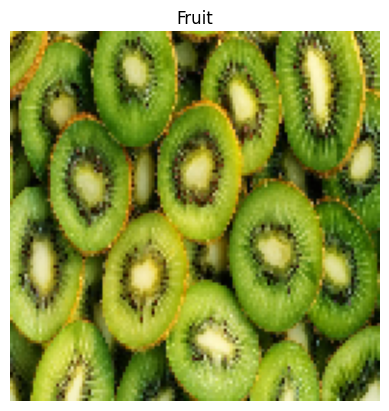

In [20]:
import os
import glob
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Lists of fruits and vegetables
fruits = ["Banana", "Apple", "Pear", "Grapes", "Orange", "Kiwi", "Watermelon",
          "Pomegranate", "Pineapple", "Mango"]
vegetables = ["Cucumber", "Carrot", "Capsicum", "Onion", "Potato", "Lemon",
              "Tomato", "Radish", "Beetroot", "Cabbage", "Lettuce", "Spinach",
              "Soybean", "Cauliflower", "Bell Pepper", "Chilly", "Pepper",
              "Turnip", "Corn", "Sweetcorn", "Sweet Potato", "Paprika",
              "Jalapeño", "Ginger", "Garlic", "Peas", "Eggplant"]

# Convert lists to lowercase for robust matching
fruits_lower = [f.lower() for f in fruits]
vegetables_lower = [v.lower() for v in vegetables]

# Mapping for visualization
label_map = {0: "Fruit", 1: "Vegetable"}

# Paths to the folders
train_path = "/content/train"
val_path = "/content/validation"
test_path = "/content/test"

# Function to load images with numeric labels
def load_images_numeric_labels(folder_path, img_size=(128,128)):
    image_paths = glob.glob(os.path.join(folder_path, "*/*.jpg"))
    images = []
    labels = []

    for img_path in image_paths:
        # Load and resize image
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)

        # Get folder name and normalize
        folder_name = os.path.basename(os.path.dirname(img_path)).lower().strip()

        # Assign 0 for Fruit, 1 for Vegetable
        if folder_name in fruits_lower:
            labels.append(0)   # Fruit = 0
        elif folder_name in vegetables_lower:
            labels.append(1)   # Vegetable = 1
        else:
            labels.append(-1)  # Unknown class (optional)

    return np.array(images), np.array(labels)

# Load datasets
X_train, y_train = load_images_numeric_labels(train_path)
X_val, y_val = load_images_numeric_labels(val_path)
X_test, y_test = load_images_numeric_labels(test_path)

print("Training data:", X_train.shape, y_train.shape)
print("Validation data:", X_val.shape, y_val.shape)
print("Test data:", X_test.shape, y_test.shape)

# Optional: show one image with readable label
plt.imshow(X_train[0])
plt.title(label_map.get(y_train[0], "Unknown"))
plt.axis('off')
plt.show()


#Prepare Labels

In [21]:
from tensorflow.keras.utils import to_categorical

# Convert numeric labels to one-hot
y_train_cat = to_categorical(y_train, num_classes=2)
y_val_cat = to_categorical(y_val, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)


#Build CNN model

In [22]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes: Fruit or Vegetable
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Train the Model

Use your training and validation sets:

In [23]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=15,
    batch_size=16
)


Epoch 1/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 83s 464ms/step - accuracy: 0.6973 - loss: 0.6585 - val_accuracy: 0.7216 - val_loss: 0.5477
Epoch 2/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 82s 467ms/step - accuracy: 0.7261 - loss: 0.5663 - val_accuracy: 0.7216 - val_loss: 0.5108
Epoch 3/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 81s 458ms/step - accuracy: 0.7354 - loss: 0.5353 - val_accuracy: 0.7455 - val_loss: 0.4804
Epoch 4/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 81s 454ms/step - accuracy: 0.7327 - loss: 0.5213 - val_accuracy: 0.7874 - val_loss: 0.4521
Epoch 5/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 85s 474ms/step - accuracy: 0.7943 - loss: 0.4652 - val_accuracy: 0.8623 - val_loss: 0.3539
Epoch 6/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 139s 457ms/step - accuracy: 0.8120 - loss: 0.4050 - val_accuracy: 0.8713 - val_loss: 0.3652
Epoch 7/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 82s 455ms/step - accuracy: 0.8362 - loss: 0.3824 - val_accuracy: 0.9311 - val_loss: 0.2247
Epoch 8/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 77s 443ms/step - accuracy: 0.8701 - loss: 

#Evaluate the Model

Check test accuracy:

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.9829 - loss: 0.2381
Test Accuracy: 0.9880239367485046


#Save the Model

After training, save the model for later use in classifying uploaded images:

In [28]:
model.save("fruit_vegetable_classifier.keras")


#Predict on a New Image

When the user uploads an image:

Saving Potato.jpeg to Potato.jpeg


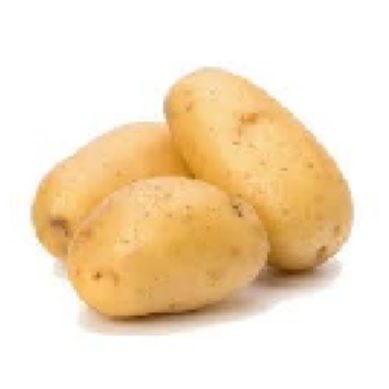

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted label for Potato.jpeg: Vegetable (confidence: 0.86)


In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("fruit_vegetable_classifier.keras")  # use .keras format

# Mapping numeric labels to readable labels
label_map = {0: "Fruit", 1: "Vegetable"}

# Set a confidence threshold (0.6 means 60%)
CONFIDENCE_THRESHOLD = 0.6

# Upload a new image
uploaded = files.upload()

for img_name in uploaded.keys():
    # Load and resize image to match training size (128x128)
    img = image.load_img(img_name, target_size=(128,128))

    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Convert image to array and normalize
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Predict
    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    confidence = np.max(pred)

    # Check confidence threshold
    if confidence < CONFIDENCE_THRESHOLD:
        label = "Unknown"
    else:
        label = label_map[class_idx]

    print(f"Predicted label for {img_name}: {label} (confidence: {confidence:.2f})")
